# Vendas de Jogos de Videogames

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import math

import matplotlib.pyplot as plt
%matplotlib inline    
plt.style.use('ggplot')   #estilo que os gráficos terão. Adiciona cores e padrões diferentes para personalizar

import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno

from sklearn.preprocessing import StandardScaler
from scipy import stats

# import os 
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [2]:
# Leitura do arquivo
videogames = pd.read_csv('dados/vgsales.csv')
videogames.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
# Renomeando as colunas
videogames.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Gênero', 'Editora', 'Vendas América do Norte',
                      'Vendas EUA', 'Vendas Japão', 'Outras Vendas', 'Vendas Global']
videogames.head(10)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
#apaguei alguns dados pois, a partir de 2016 os dados estão incompletos
drop_row_index = videogames[videogames['Ano'] > 2015].index
videogames = videogames.drop(drop_row_index)
videogames

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
# Quantidade de linhas e colunas no Dataframe
videogames.shape

(16250, 11)

### Resumo de algumas informações

In [6]:
videogames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Ranking                  16250 non-null  int64  
 1   Nome                     16250 non-null  object 
 2   Plataforma               16250 non-null  object 
 3   Ano                      15979 non-null  float64
 4   Gênero                   16250 non-null  object 
 5   Editora                  16194 non-null  object 
 6   Vendas América do Norte  16250 non-null  float64
 7   Vendas EUA               16250 non-null  float64
 8   Vendas Japão             16250 non-null  float64
 9   Outras Vendas            16250 non-null  float64
 10  Vendas Global            16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:
videogames.describe()

,Ranking,Ano,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Global
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
videogames.describe(include = ['object', 'bool'])

,Nome,Plataforma,Gênero,Editora
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [9]:
# Tipos de dados em cada coluna
videogames.dtypes

Ranking                      int64
Nome                        object
Plataforma                  object
Ano                        float64
Gênero                      object
Editora                     object
Vendas América do Norte    float64
Vendas EUA                 float64
Vendas Japão               float64
Outras Vendas              float64
Vendas Global              float64
dtype: object

In [10]:
# Verificando linhas com NaN
videogames[videogames['Ano'].isnull()]

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Global
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [11]:
videogames.isnull().sum()

Ranking                      0
Nome                         0
Plataforma                   0
Ano                        271
Gênero                       0
Editora                     56
Vendas América do Norte      0
Vendas EUA                   0
Vendas Japão                 0
Outras Vendas                0
Vendas Global                0
dtype: int64

In [12]:
# Verificando quantidade de jogos por plataforma
videogames['Plataforma'].value_counts()

DS      2162
PS2     2161
Wii     1325
PS3     1297
X360    1257
PSP     1213
PS      1196
PC       922
XB       824
GBA      822
GC       556
3DS      474
PSV      351
N64      319
SNES     239
PS4      228
SAT      173
XOne     159
WiiU     133
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

In [13]:
# videogames['Plataforma'].value_counts().plot()

## Questionamentos

### 1. Qual a quantidade de jogos por gênero?

In [14]:
videogames['Gênero'].value_counts()

Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: Gênero, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Misc'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Shooter'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Platform'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Strategy'),
  Text(11, 0, 'Puzzle')])

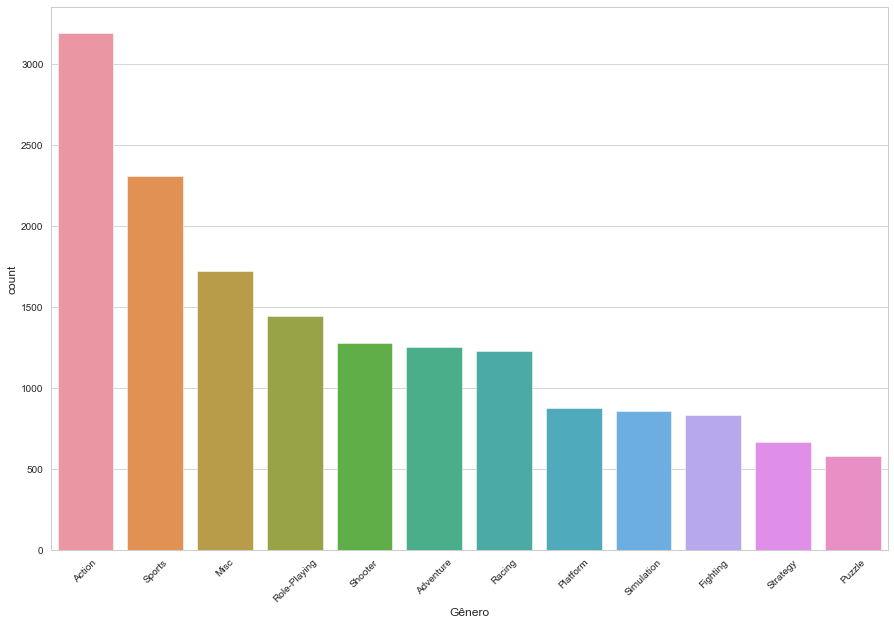

In [15]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'Gênero', data = videogames, order = videogames['Gênero'].value_counts().index)
plt.xticks(rotation = 45)

### 2. Qual ano teve maior lançamento?

In [16]:
videogames['Ano'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Ano, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2006.0'),
  Text(6, 0, '2005.0'),
  Text(7, 0, '2002.0'),
  Text(8, 0, '2003.0'),
  Text(9, 0, '2004.0'),
  Text(10, 0, '2012.0'),
  Text(11, 0, '2015.0'),
  Text(12, 0, '2014.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2001.0'),
  Text(15, 0, '1998.0'),
  Text(16, 0, '2000.0'),
  Text(17, 0, '1999.0'),
  Text(18, 0, '1997.0'),
  Text(19, 0, '1996.0'),
  Text(20, 0, '1995.0'),
  Text(21, 0, '1994.0'),
  Text(22, 0, '1993.0'),
  Text(23, 0, '1981.0'),
  Text(24, 0, '1992.0'),
  Text(25, 0, '1991.0'),
  Text(26, 0, '1982.0'),
  Text(27, 0, '1986.0'),
  Text(28, 0, '1989.0'),
  Text(29, 0, '1983.0'),
  Text(30, 0, '1990.0'),
  Text(31, 0, '1987.0'),
  Text(32, 0, '1988.0'),
  Text(33, 0, '

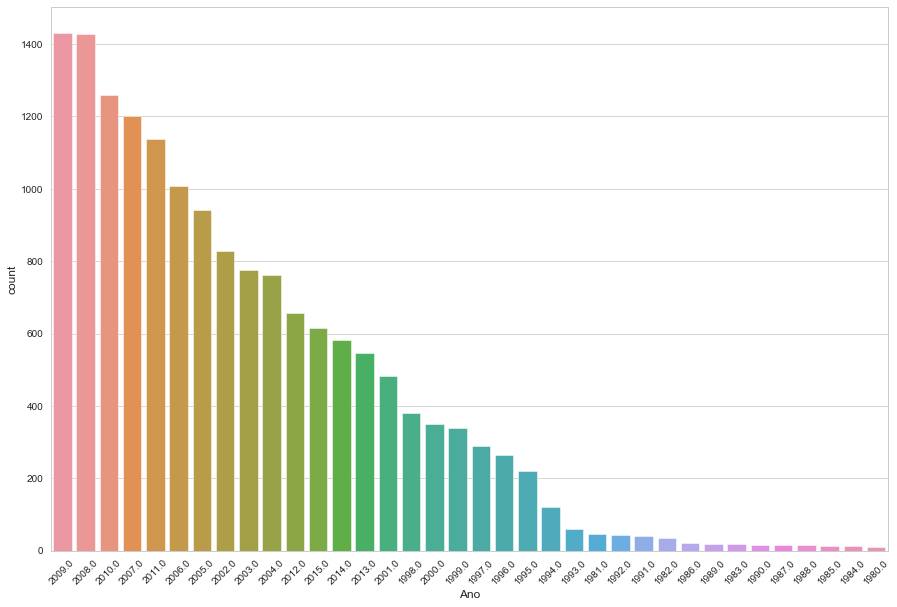

In [17]:
plt.figure(figsize = (15, 10))
sns.countplot(x = 'Ano', data = videogames, order = videogames.groupby(by = ['Ano'])['Nome'].count().sort_values(ascending = False).index)
plt.xticks(rotation = 45)

### 3. Top 5 anos de lançamento por gênero

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2009.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2010.0'),
  Text(3, 0, '2007.0'),
  Text(4, 0, '2011.0')])

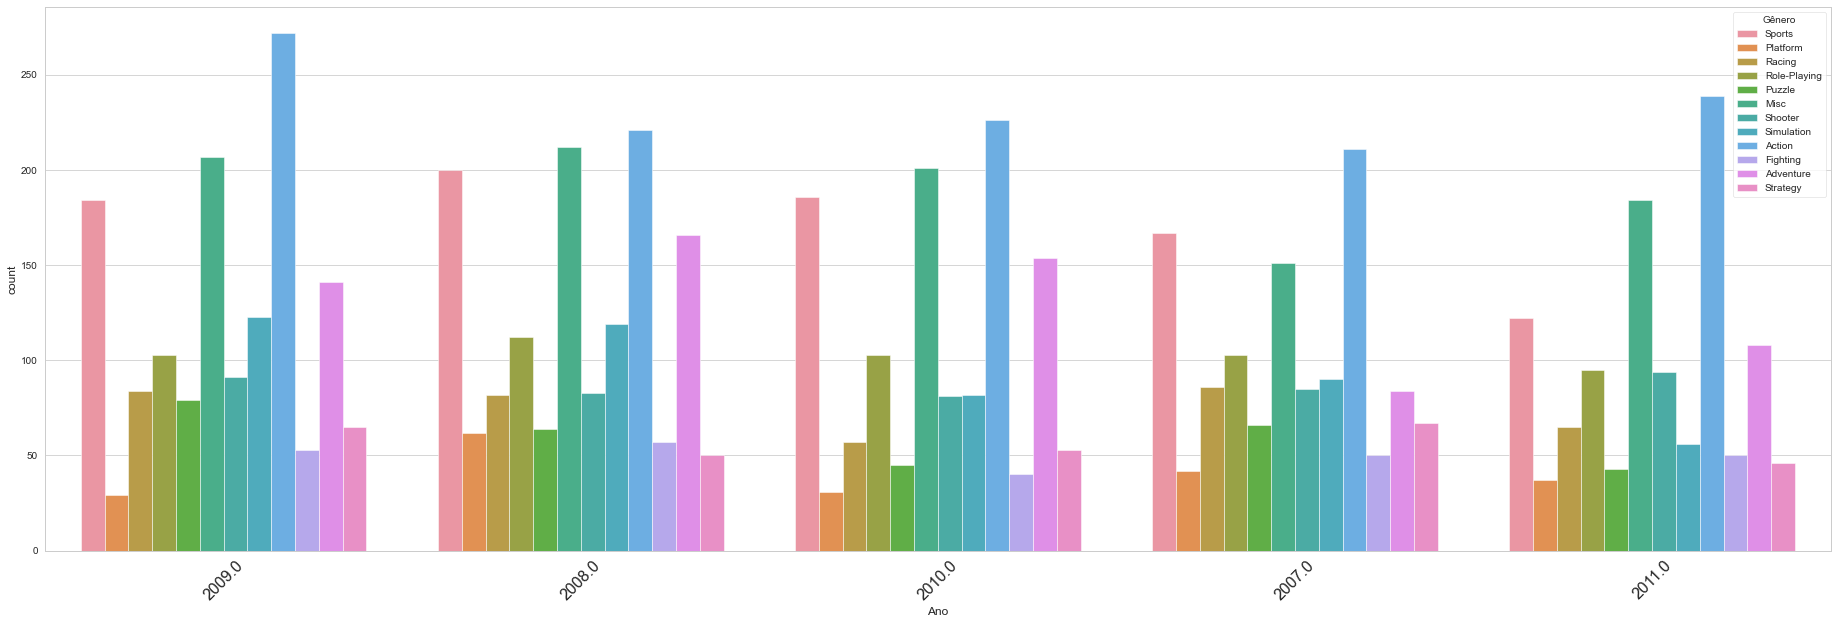

In [18]:
plt.figure(figsize = (32, 10))
sns.countplot(x = 'Ano', data = videogames, hue = 'Gênero', order = videogames.Ano.value_counts().iloc[:5].index)
plt.xticks(size = 16, rotation = 45)

### 4. Qual a quantidade de vendas global por ano e qual ano teve a maior quantidade de vendas?

In [19]:
videogames_ano = videogames.groupby(by = ['Ano'])['Vendas Global'].sum()
videogames_ano = videogames_ano.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  Text(33, 0, '

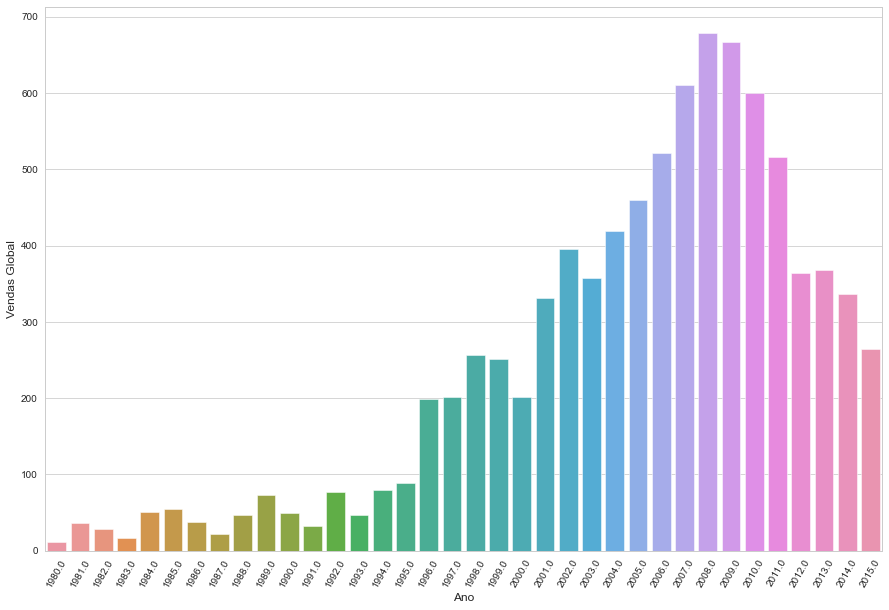

In [20]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Ano', y = 'Vendas Global', data = videogames_ano)
plt.xticks(rotation = 60)

Note que o ano de 2006 está no top 5 anos com maiores vendas global, porém não faz parte do top 5 anos de 
lançamento de jogos por gênero.

### 5. Qual gênero teve mais lançamento em um único ano?

In [21]:
ano_max_df = videogames.groupby(['Ano', 'Gênero']).size().reset_index(name = 'Quantidade')
ano_max_idx = ano_max_df.groupby(['Ano'])['Quantidade'].transform(max) == ano_max_df['Quantidade']
ano_max_genero = ano_max_df[ano_max_idx].reset_index(drop = True)
ano_max_genero = ano_max_genero.drop_duplicates(subset = ['Ano', 'Quantidade'], keep = 'last').reset_index(drop = True)
# ano_max_idx    # Apresenta os valores boleanos 
ano_max_genero

,Ano,Gênero,Quantidade
0,1980.0,Misc,4
1,1981.0,Action,25
2,1982.0,Action,18
3,1983.0,Action,7
4,1984.0,Shooter,3
5,1985.0,Puzzle,4
6,1986.0,Platform,6
7,1987.0,Sports,4
8,1988.0,Platform,4
9,1989.0,Puzzle,5


In [22]:
genero = ano_max_genero['Gênero'].values
# genero       # Array com os gêneros

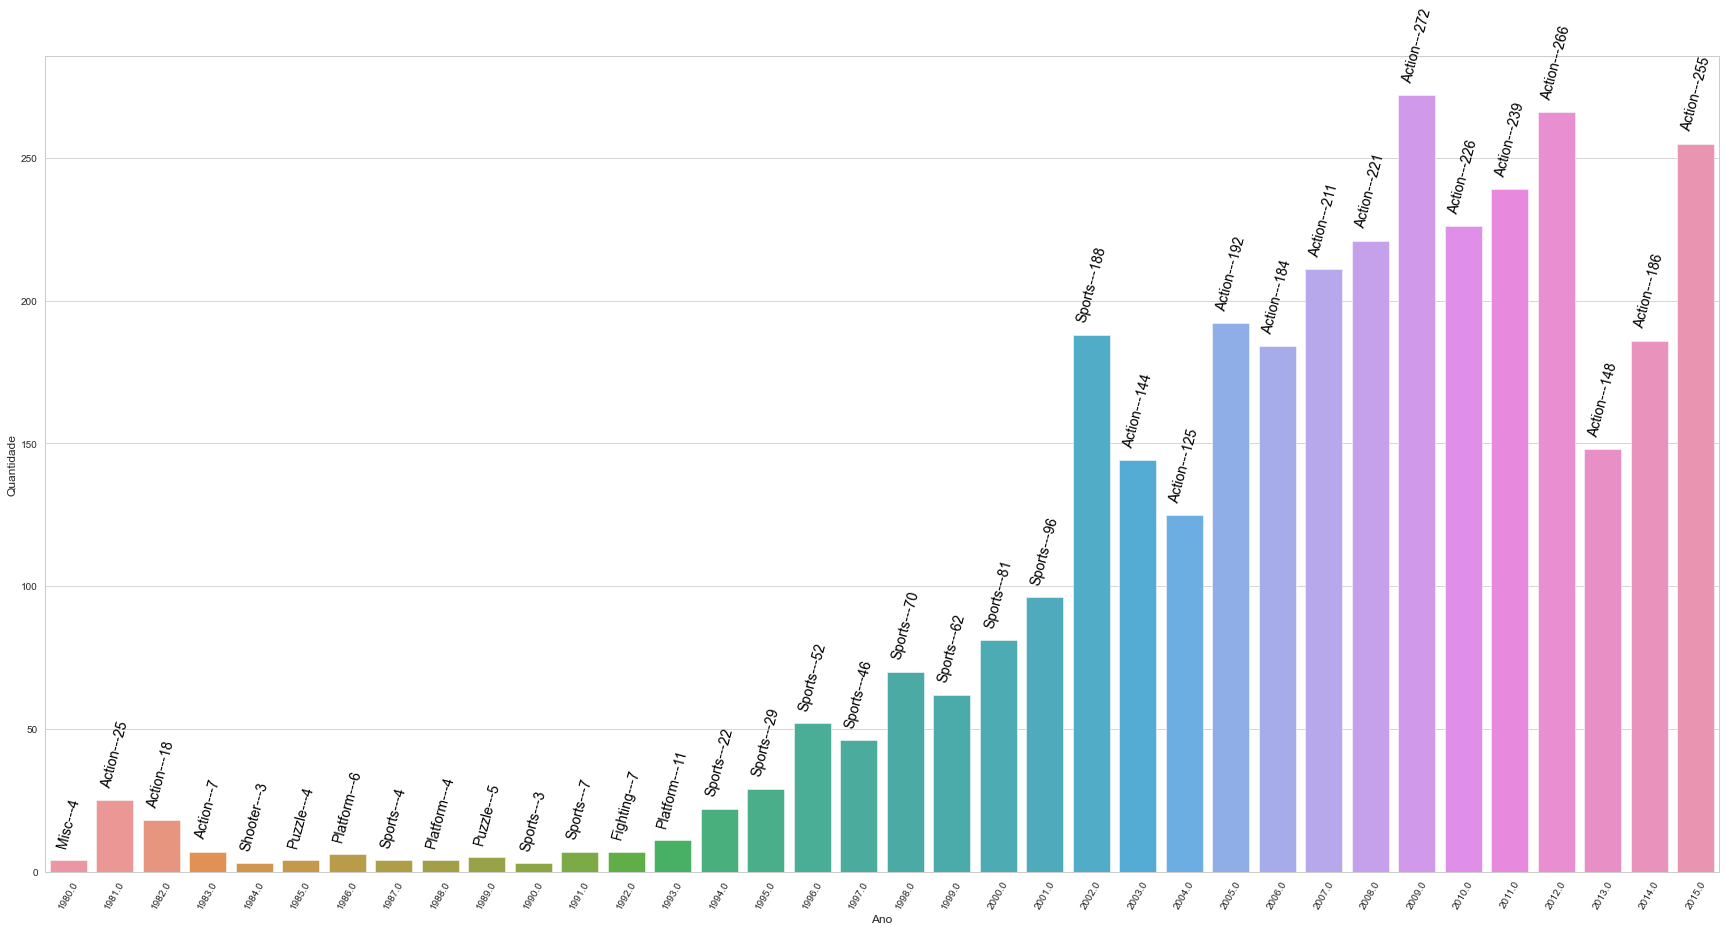

In [23]:
plt.figure(figsize = (30,15))
g = sns.barplot(x = 'Ano', y = 'Quantidade', data = ano_max_genero)
index = 0
for value in ano_max_genero['Quantidade'].values:
    g.text(index, value + 5, str(genero[index] + '---' + str(value)), color = '#000', size = 14, rotation = 75, ha = 'center')
    index += 1
    
plt.xticks(rotation = 60)
plt.show()

Observe que na última década (2003 - 2015), o gênero mais lançado é de ação.

### 6. Qual gênero vendeu mais em um único ano?

In [24]:
ano_vendas_dx = videogames.groupby(by = ['Ano', 'Gênero'])['Vendas Global'].sum().reset_index()
ano_vendas = ano_vendas_dx.groupby(by = ['Ano'])['Vendas Global'].transform(max) == ano_vendas_dx['Vendas Global']
ano_vendas_max = ano_vendas_dx[ano_vendas].reset_index(drop = True)
ano_vendas_max

,Ano,Gênero,Vendas Global
0,1980.0,Shooter,7.07
1,1981.0,Action,14.84
2,1982.0,Puzzle,10.03
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75


In [25]:
genero = ano_vendas_max['Gênero']

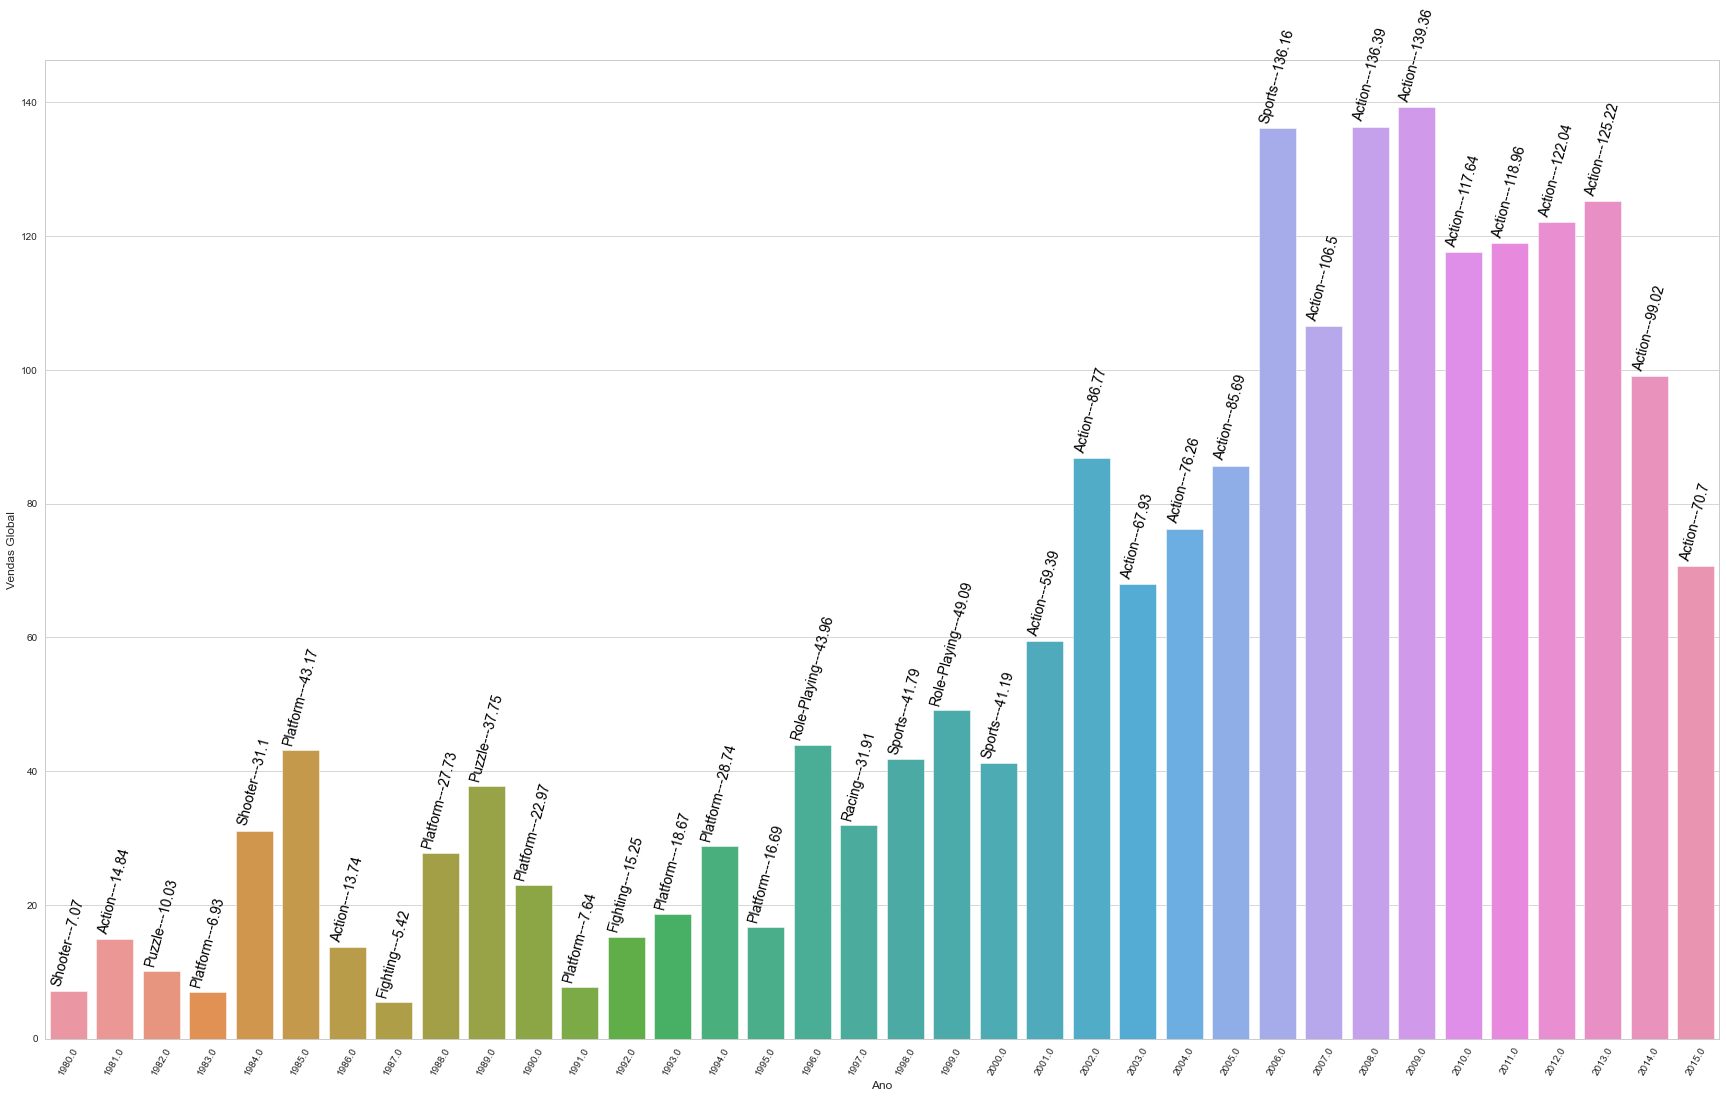

In [26]:
plt.figure(figsize = (30,18))
g = sns.barplot(x ='Ano', y = 'Vendas Global', data = ano_vendas_max)

index = 0

for value in ano_vendas_max['Vendas Global']:
    g.text(index, value + 1, str(genero[index] + '---' + str(round(value, 2))), color = '#000', size = 14, rotation = 75, 
           ha = 'center')
    index += 1
    
plt.xticks(rotation = 60)
plt.show()

### 7. Qual gênero teve o maior preço de venda globalmente?

In [34]:
videogames_genero = videogames.groupby(by = ['Gênero'])['Vendas Global'].sum()
videogames_genero = videogames_genero.reset_index()
videogames_genero = videogames_genero.sort_values(by = ['Vendas Global'], ascending = False)
videogames_genero

,Gênero,Vendas Global
0,Action,1731.26
10,Sports,1316.33
8,Shooter,1019.15
7,Role-Playing,920.57
4,Platform,829.30
3,Misc,808.79
6,Racing,730.40
2,Fighting,445.05
9,Simulation,391.52
5,Puzzle,244.95


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Sports'),
  Text(2, 0, 'Shooter'),
  Text(3, 0, 'Role-Playing'),
  Text(4, 0, 'Platform'),
  Text(5, 0, 'Misc'),
  Text(6, 0, 'Racing'),
  Text(7, 0, 'Fighting'),
  Text(8, 0, 'Simulation'),
  Text(9, 0, 'Puzzle'),
  Text(10, 0, 'Adventure'),
  Text(11, 0, 'Strategy')])

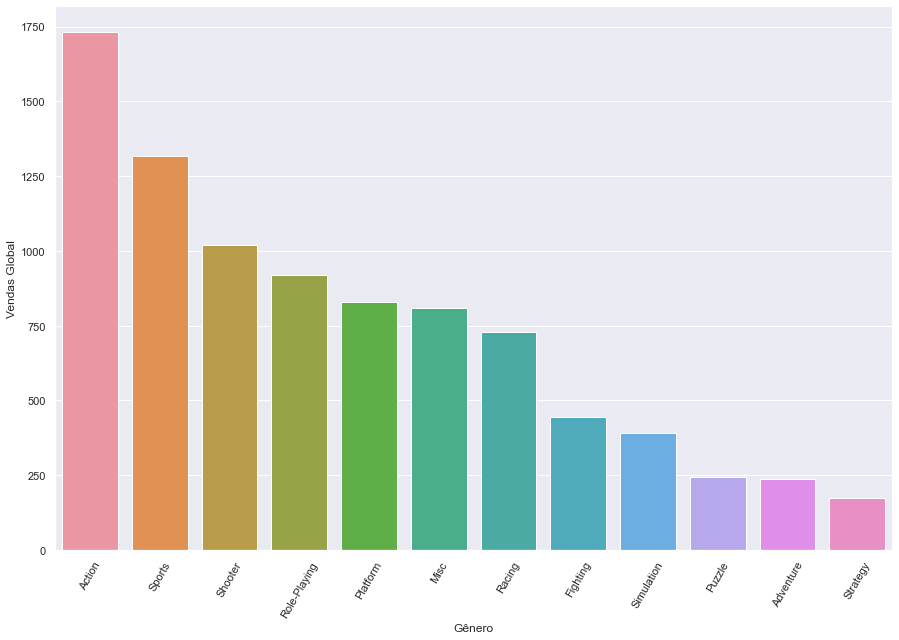

In [35]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'Gênero', y = 'Vendas Global', data = videogames_genero)
plt.xticks(rotation = 60)

## Criando gráficos

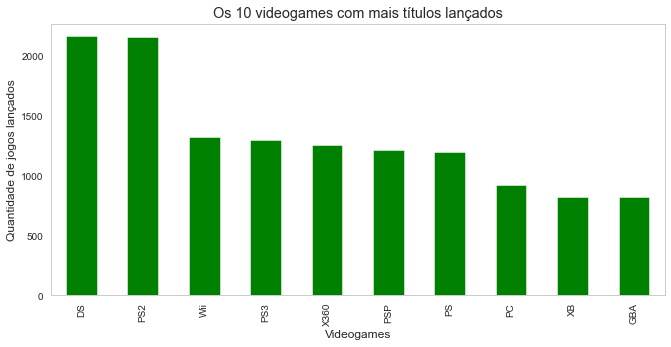

In [28]:
# Os 10 videogames com mais títulos lançados
videogames['Plataforma'].value_counts().head(10).plot(kind = 'bar', figsize = (11,5), grid = False, color = 'green')

plt.title('Os 10 videogames com mais títulos lançados')  # Adicionando um título ao gráfico
plt.xlabel('Videogames')  # Renomeando eixo x
plt.ylabel('Quantidade de jogos lançados')  # Renomeando eixo y
plt.show()

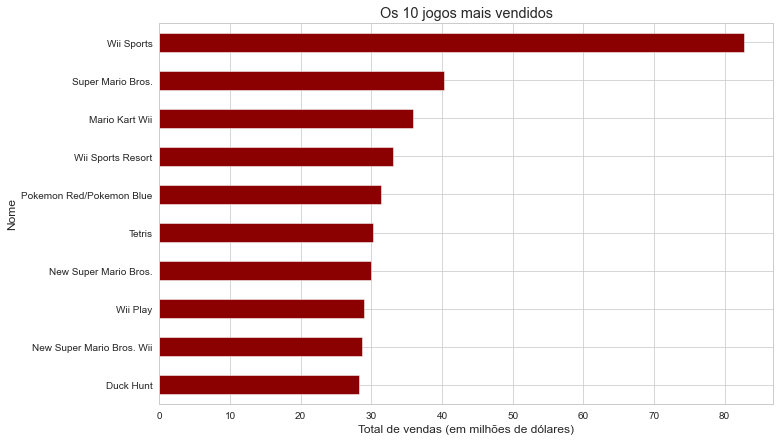

In [29]:
# Top 10 - os 10 jogos mais vendidos
tp_10_vendidos = videogames[['Nome', 'Vendas Global']].head(10).set_index('Nome').sort_values('Vendas Global', ascending = True)
tp_10_vendidos.plot(kind = 'barh', figsize = (11,7), grid = True, color = 'darkred', legend = False )

plt.title('Os 10 jogos mais vendidos')
plt.xlabel('Total de vendas (em milhões de dólares)')
plt.show()

# Informações cruzadas

In [30]:
crosstab_vg = pd.crosstab(videogames['Plataforma'], videogames['Gênero'])
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,166,33,13,49,26,20,11,81,7,28,26,14
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,284,148,79


In [31]:
# Acrescentando o total 
crosstab_vg['Total'] = crosstab_vg.sum(axis = 1)
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Plataforma,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,166,33,13,49,26,20,11,81,7,28,26,14,474
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,284,148,79,2162


## Heatmap - gráfico de calor

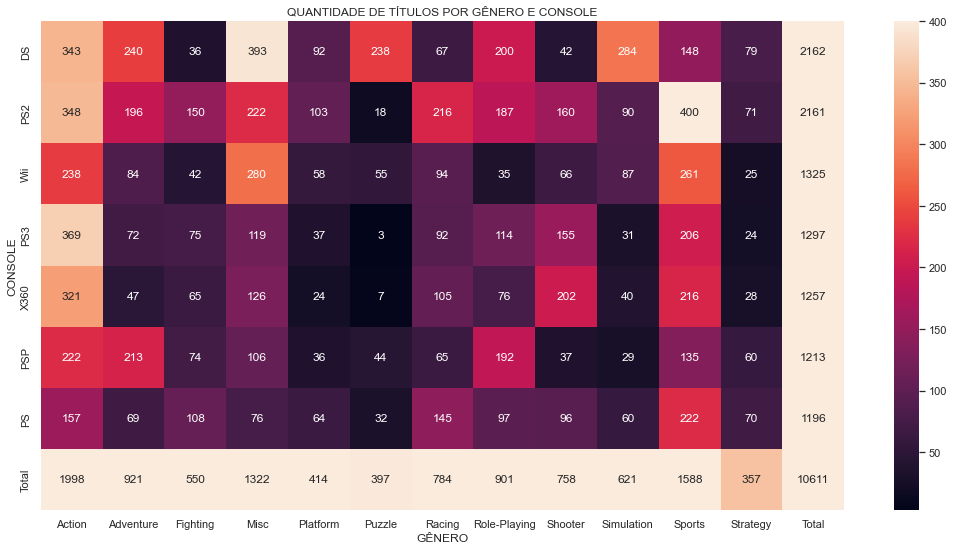

In [32]:
#crio um DataFrame pra armazenar os 10 consoles que tiveram mais ançamentos, coloco uma condição > 1000 e utilizo os 
#sort_values para ordenar pela coluna total em ordem decrescente
top10_plataforma = crosstab_vg[crosstab_vg['Total'] > 1000].sort_values('Total', ascending = False) 

# aqui crio um novo DataFrame similar ao anterior, mas que adiciona uma nova linha com o total no final do DataFrame
top10_final = top10_plataforma.append(pd.DataFrame(top10_plataforma.sum(), columns = ['Total']).T, ignore_index = False)

sns.set(font_scale = 1) #tamanho da fonte no gráfico
plt.figure(figsize = (18,9)) #tamanho do gráfico

#utilizo a função heatmap (que cria o mapa de calor). O primeiro argumento é o que quero exibir, no caso top10_final, 
#depois annot faz com que os números dos quadrados apareçam. Após vmax e vmim definem os valores máximos e mínimos, para isso 
#utilizei a função .loc e filtro as linhas e colunas do DataFrama. Por fim, fmt para formatar as informações pra ficarem bem apresentadas
sns.heatmap(top10_final, annot = True, vmax = top10_final.loc[: 'PS', : 'Strategy'].values.max(), 
            vmin = top10_final.loc[: , : 'Strategy'].values.min(), fmt = 'd' )
plt.xlabel('GÊNERO')
plt.ylabel('CONSOLE')
plt.title('QUANTIDADE DE TÍTULOS POR GÊNERO E CONSOLE')
plt.show()